In [1]:
import os

In [2]:
os.chdir('..')

In [3]:
os.listdir()

['.git',
 '.gitignore',
 '.idea',
 'data_loader',
 'data_processor',
 'jupyter',
 'loggers',
 'main.py',
 'model',
 'models',
 'original_data',
 'processed_data',
 'README.md',
 'requirements.txt',
 'saved_models',
 'trainers']

In [4]:
from data_processor.utils import load_numpy_arrays, numpy_to_tensor
from models.Linear import LogisticRegression
import trainers.SGD_trainer
from loggers.statistics_loggers import plot_numerical_arrays
import torch

In [5]:
data_train, data_val = load_numpy_arrays(['data_train.npy', 'data_val.npy'], 
                                            path_prefix='processed_data/processed_features/10-genres/')

In [6]:
X_train, y_train = data_train[:, :-1], data_train[:, -1]
X_val, y_val = data_val[:, :-1], data_val[:, -1]

In [7]:
X_train, y_train, X_val, y_val = numpy_to_tensor([X_train, y_train, X_val, y_val])

In [8]:
y_train = y_train.type(torch.int64)
y_val = y_val.type(torch.int64)

In [9]:
print(X_train.shape)
print(y_train.shape)

torch.Size([800, 57])
torch.Size([800])


In [10]:
print(X_train[0])
print(y_train[0])

tensor([ 0.4430,  0.7689,  1.1854,  0.9865,  1.1729,  2.2850,  1.5993,  0.5470,
         1.2933,  1.4533,  0.3579,  1.6253,  0.2378,  0.9808,  0.3478,  1.0291,
         0.8722,  0.6536,  0.1507, -1.0807,  0.9324,  1.5295,  1.6476, -0.6216,
         1.2637,  1.2384,  0.5888, -0.9140,  2.3868,  2.1714,  1.2330, -0.8752,
         1.5690,  1.2485,  0.6235, -0.4043,  0.5381,  1.3089,  0.5665, -0.1021,
         0.4306,  1.0201, -0.0346,  0.0734,  0.1968,  0.4319, -0.1783, -1.0909,
        -0.1586,  0.6607, -0.2541, -0.3802, -0.1895,  0.4879, -0.3387,  0.0709,
        -0.0540])
tensor(7)


In [11]:
print(X_val.shape)
print(y_val.shape)

torch.Size([100, 57])
torch.Size([100])


In [12]:
input_length = 57
output_length = 10
model = LogisticRegression(57, 10)

In [13]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)

In [14]:
training_loss_array, training_accuracy_array, validation_loss_array, validation_accuracy_array = trainers.SGD_trainer.train(model, [X_train, y_train, X_val, y_val], 
                                                                                                                            loss, optimizer, batch_size=200, num_epoch=100, saved_model_name='saved_models/saved_logistic_regression_csv.pt')

Epoch  0: loss on final training batch: 1.3549
training accuracy: 49.88% validation accuracy: 44.00%
Epoch  1: loss on final training batch: 1.0575
training accuracy: 61.38% validation accuracy: 63.00%
Epoch  2: loss on final training batch: 0.9138
training accuracy: 67.12% validation accuracy: 65.00%
Epoch  3: loss on final training batch: 0.8163
training accuracy: 72.88% validation accuracy: 66.00%
Epoch  4: loss on final training batch: 0.7451
training accuracy: 75.75% validation accuracy: 66.00%
Epoch  5: loss on final training batch: 0.6907
training accuracy: 77.88% validation accuracy: 65.00%
Epoch  6: loss on final training batch: 0.6371
training accuracy: 79.50% validation accuracy: 64.00%
Epoch  7: loss on final training batch: 0.5935
training accuracy: 81.38% validation accuracy: 64.00%
Epoch  8: loss on final training batch: 0.5673
training accuracy: 82.88% validation accuracy: 65.00%
Epoch  9: loss on final training batch: 0.5465
training accuracy: 83.75% validation accurac

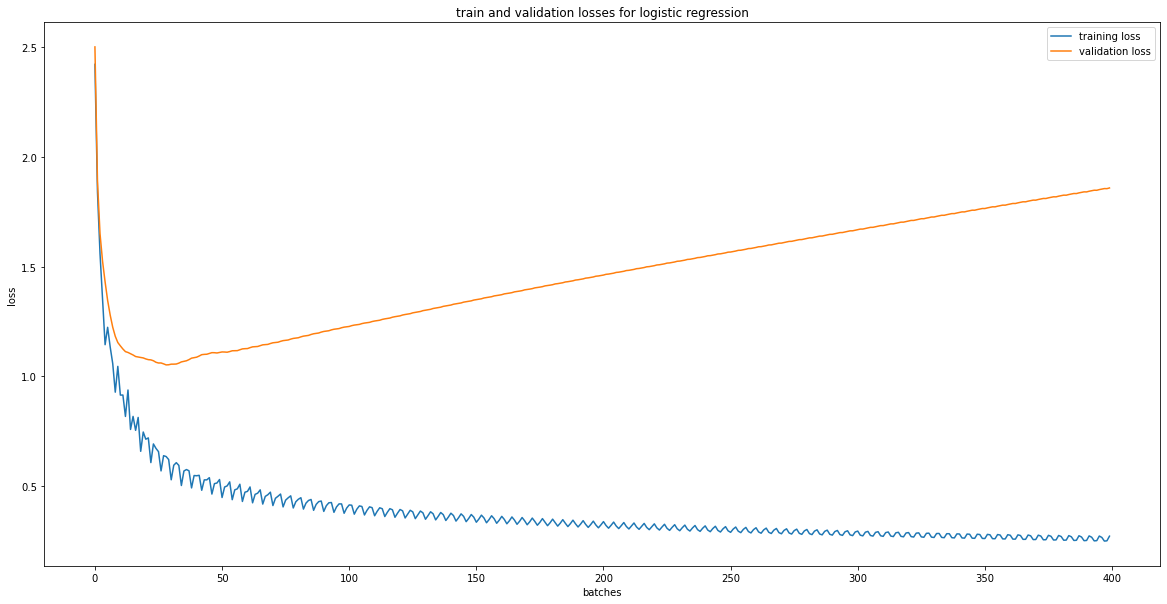

In [15]:
plot_numerical_arrays([training_loss_array, validation_loss_array], ['training loss', 'validation loss'], 
                      xlabel='batches', ylabel='loss', title='train and validation losses for logistic regression')

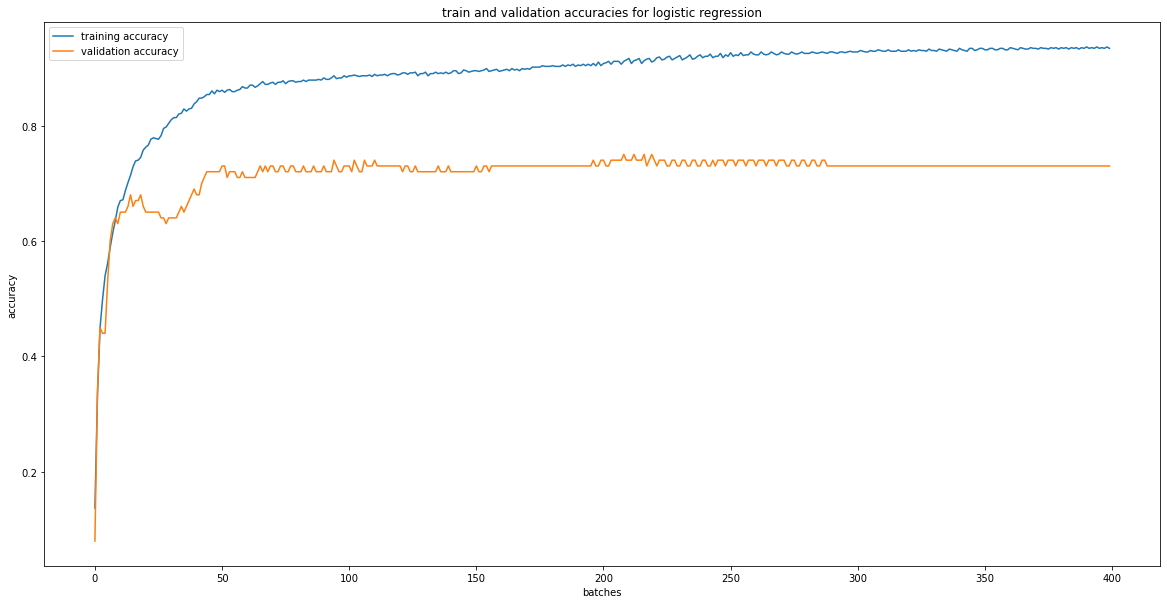

In [16]:
plot_numerical_arrays([training_accuracy_array, validation_accuracy_array], ['training accuracy', 'validation accuracy'], 
                      xlabel='batches', ylabel='accuracy', title='train and validation accuracies for logistic regression')